# STAT 567 - Statistical Model and Computing

# **Understanding Customer Churn using Survival Analysis**

**Final Project** <br>
Manisha Gayatri Damera - md1723 <br>
Neha Thonta - nt446 <br>
Vivek Reddy Chithari - vc508 <br>
Vishal Reddy Mekala - vm574

## Data Description

The dataset used in this project contains information about customers subscribed to a Telecom Service Provider. Each row depicts a single customer uniquely identified by a customerID. The variables of interest to us is 'tenure' and 'Churn'.

'Tenure' is a continuous variable and essentially specifies how long (in months) the customer has stayed with the company. 
'Churn' is a categorical variable with two values where:
Churn = 'Yes' - the customer has cancelled subscription with the company
Churn = 'No'  - the customer has been censored (or) lost track of the customer

Other variables include information about the different services the customer has subscribed to and also his/her demographic information.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
customer_data.shape

(7043, 21)

## Exploratory Data Analysis

'CustomerID' does not have any importance in our analysis, hence it can be dropped. 'TotalCharges' is just a product of 'MonthlyCharges' and 'tenure', this can be dropped too. 

In [5]:
customer_data.drop(["customerID"], inplace = True, axis = 1)
customer_data.drop(["TotalCharges"], inplace = True, axis = 1)

#### Gender, SeniorCitizen, Partner, Dependents, InternetService, PaperlessBilling, PaymentMethod & Contract

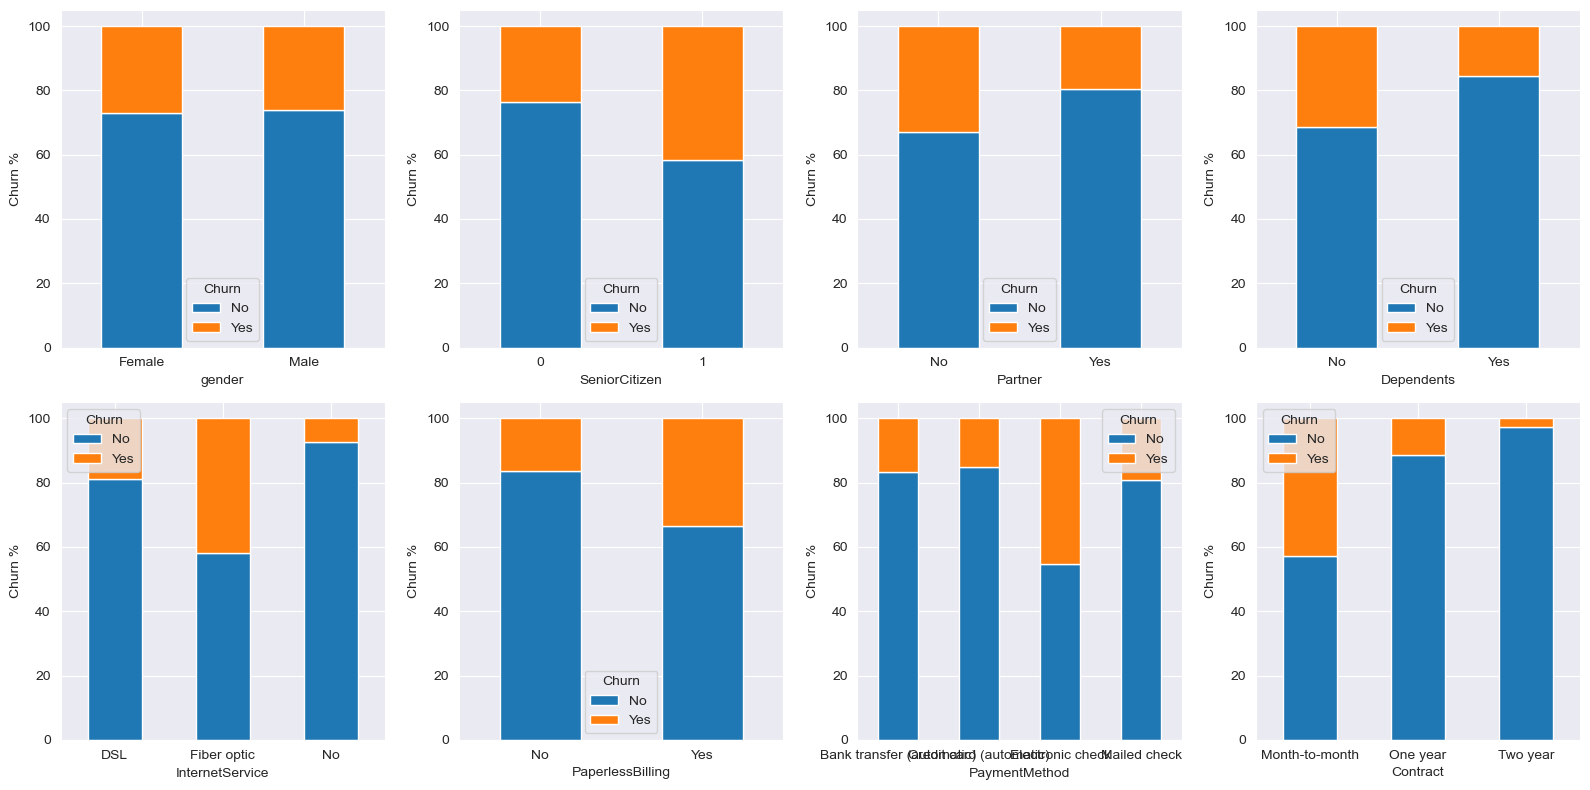

In [6]:
def get_plot(df, group, target, ax):
    temp_df = (df.groupby([group, target]).size()*100/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax=ax)
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn %')


fig, axes = plt.subplots(2, 4, figsize=(16, 8))


get_plot(customer_data, "gender", "Churn", axes[0, 0])
get_plot(customer_data, "SeniorCitizen", "Churn", axes[0, 1])
get_plot(customer_data, "Partner", "Churn", axes[0, 2])
get_plot(customer_data, "Dependents", "Churn", axes[0, 3])
get_plot(customer_data, "InternetService", "Churn", axes[1, 0])
get_plot(customer_data, "PaperlessBilling", "Churn", axes[1, 1])
get_plot(customer_data, "PaymentMethod", "Churn", axes[1, 2])
get_plot(customer_data, "Contract", "Churn", axes[1, 3])

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.tight_layout()
plt.show()

While the demographic information doesn't clearly convey the Churn % among customers, customers who opted for the company's FiberOptic Internet Service and Electronic Check Payment Method seemed to churn more than customers who opted for other options in that category. 

#### PhoneService, MultipleLines OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV & StreamingMovies


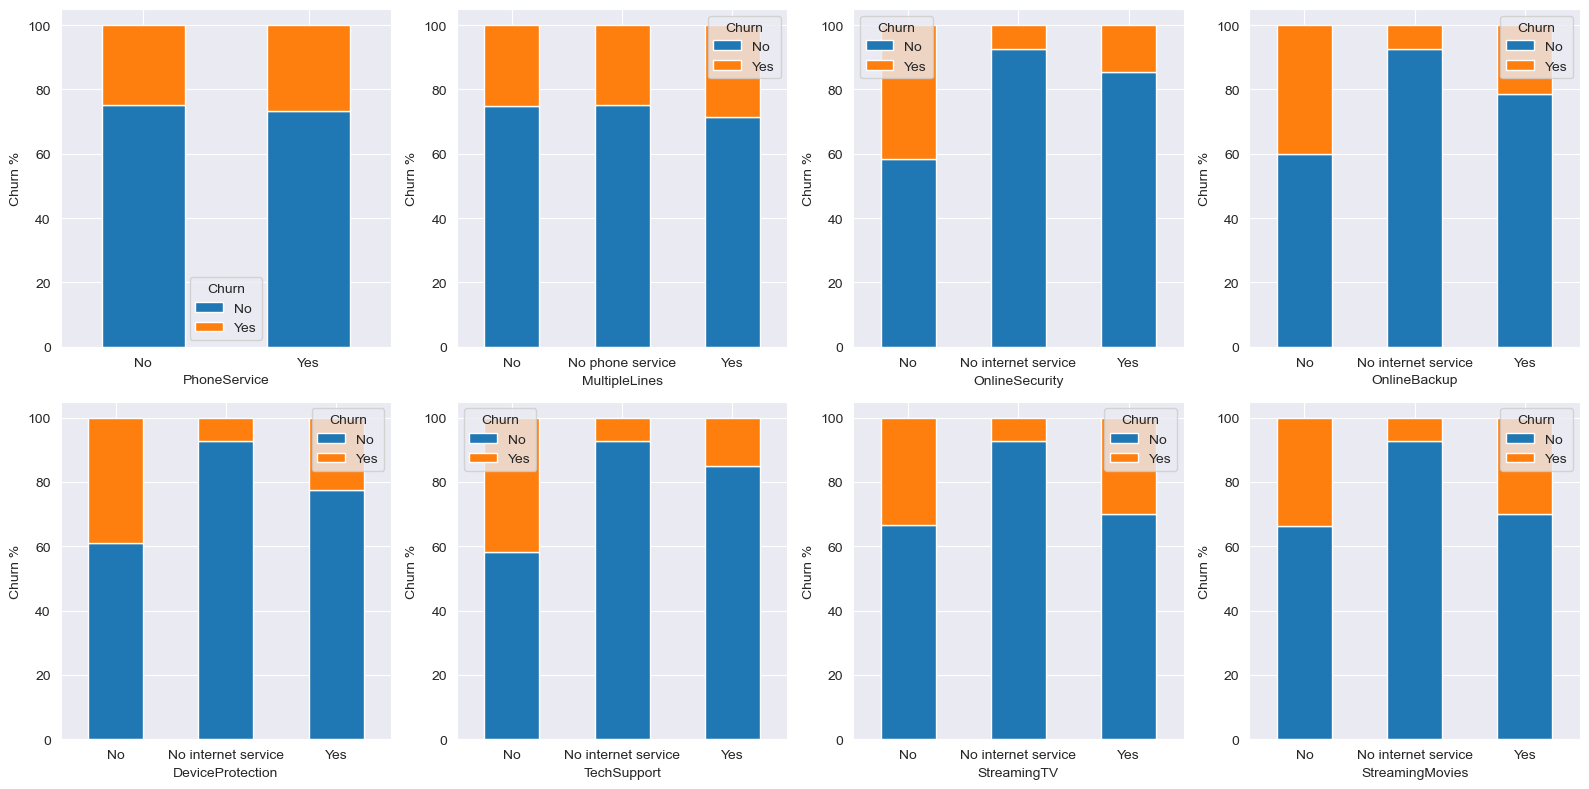

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

get_plot(customer_data, "PhoneService", "Churn", axes[0, 0])
get_plot(customer_data, "MultipleLines", "Churn", axes[0, 1])
get_plot(customer_data, "OnlineSecurity", "Churn", axes[0, 2])
get_plot(customer_data, "OnlineBackup", "Churn", axes[0, 3])
get_plot(customer_data, "DeviceProtection", "Churn", axes[1, 0])
get_plot(customer_data, "TechSupport", "Churn", axes[1, 1])
get_plot(customer_data, "StreamingTV", "Churn", axes[1, 2])
get_plot(customer_data, "StreamingMovies", "Churn", axes[1, 3])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.tight_layout()
plt.show()

A noticable pattern from the plots above is that customers who have not opted for the company's internet service have churned less than the ones who opted for it. 
This leads us to more questions - How good is the company's internet service?

### Tenure

In [8]:
customer_data['tenure'].describe()

count    7043.000000
mean       32.372710
std        24.557454
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

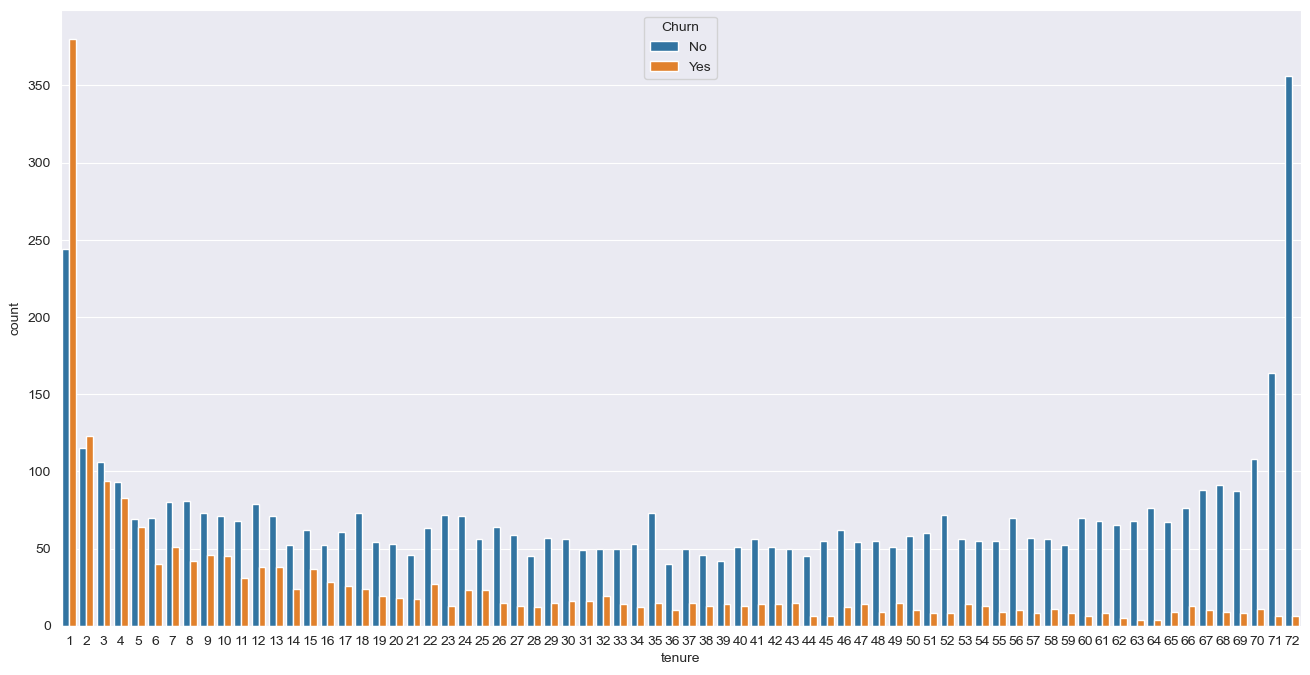

In [9]:
plt.figure(figsize=(16,8))
sns.countplot(x="tenure", hue="Churn", data=customer_data)
plt.show()

Converting into different groups to understand year-by-year churn

In [10]:
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

Text(0.5, 1.0, 'Churn by Year')

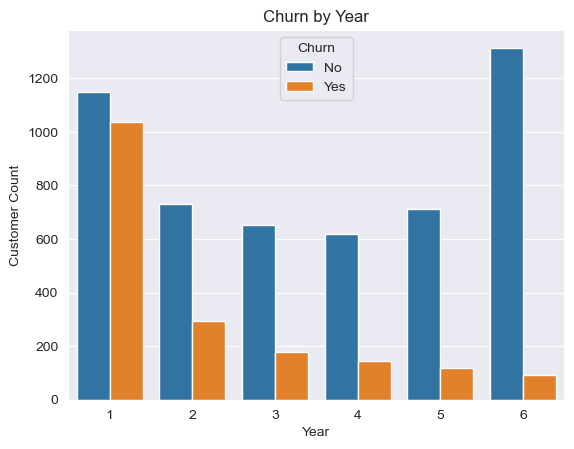

In [11]:
customer_data["tenure_group"]=customer_data["tenure"].apply(lambda x: tenure(x))

customer_data["tenure_group"].value_counts()

sns.countplot(x="tenure_group", hue="Churn", data=customer_data)
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.title('Churn by Year')

Text(0.5, 1.0, 'Churn by Year')

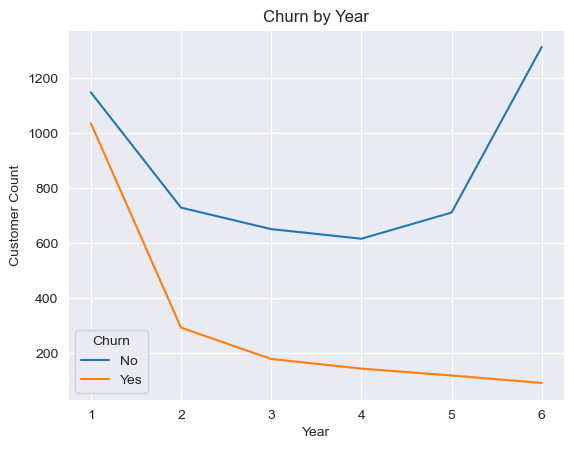

In [12]:
counts_df = pd.DataFrame(customer_data.groupby(['tenure_group', 'Churn']).size().reset_index(name='counts'))

sns.lineplot(x="tenure_group", y="counts", hue="Churn", data=counts_df)
plt.xlabel('Year')
plt.ylabel('Customer Count')
plt.title('Churn by Year')

It's pretty evident from the above two plots that customers are the most likely to churn in the first year. The company can probably attract customers with lucrative deals in the first year which can help retain them past first year. <br>
Next we'll look at how each variable plays a role in a Customer's Churn. 

## Customer Churn Survival Analysis - Statistical Methods

## Non-Parametric Methods 

In [13]:
# Importing required libraries

from scipy.stats import norm
import statsmodels.api as st
import lifelines
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

#### Data Preparation 

In [14]:
customer_data.Churn = labelencoder.fit_transform(customer_data.Churn)
customer_data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [15]:
eventvar = customer_data['Churn']
timevar = customer_data['tenure']

In [16]:
# Performing dummy encoding for categorical variables

categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(customer_data, columns = categorical, drop_first= True)

survivaldata.drop(['tenure', 'Churn', 'tenure_group'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)

survivaldata.head()

,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1.0
1,56.95,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1.0
2,53.85,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
3,42.30,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
4,70.70,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1.0


### Kaplan Meier Curve

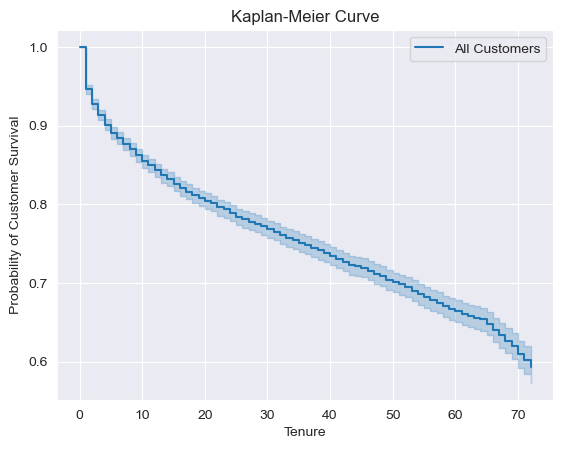

In [17]:
#Create a KaplanMeier object, imported from lifelines
kmf = KaplanMeierFitter()

#Calculate the K-M curve for all groups
kmf.fit(timevar,event_observed = eventvar,label = "All Customers")

#Plot the curve and assign labels
kmf.plot()
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

#### Interpretations

The below function gives the probability of surviving past time(t) <br>
For example, probability of surviving past timeline(3 - months) is 0.913!

In [18]:
kmf.survival_function_

,All Customers
timeline,
0.0,1.000000
1.0,0.946046
2.0,0.927918
3.0,0.913806
4.0,0.901125
...,...
68.0,0.626914
69.0,0.620191
70.0,0.609711


## Kaplan Meier Curves stratified by variables

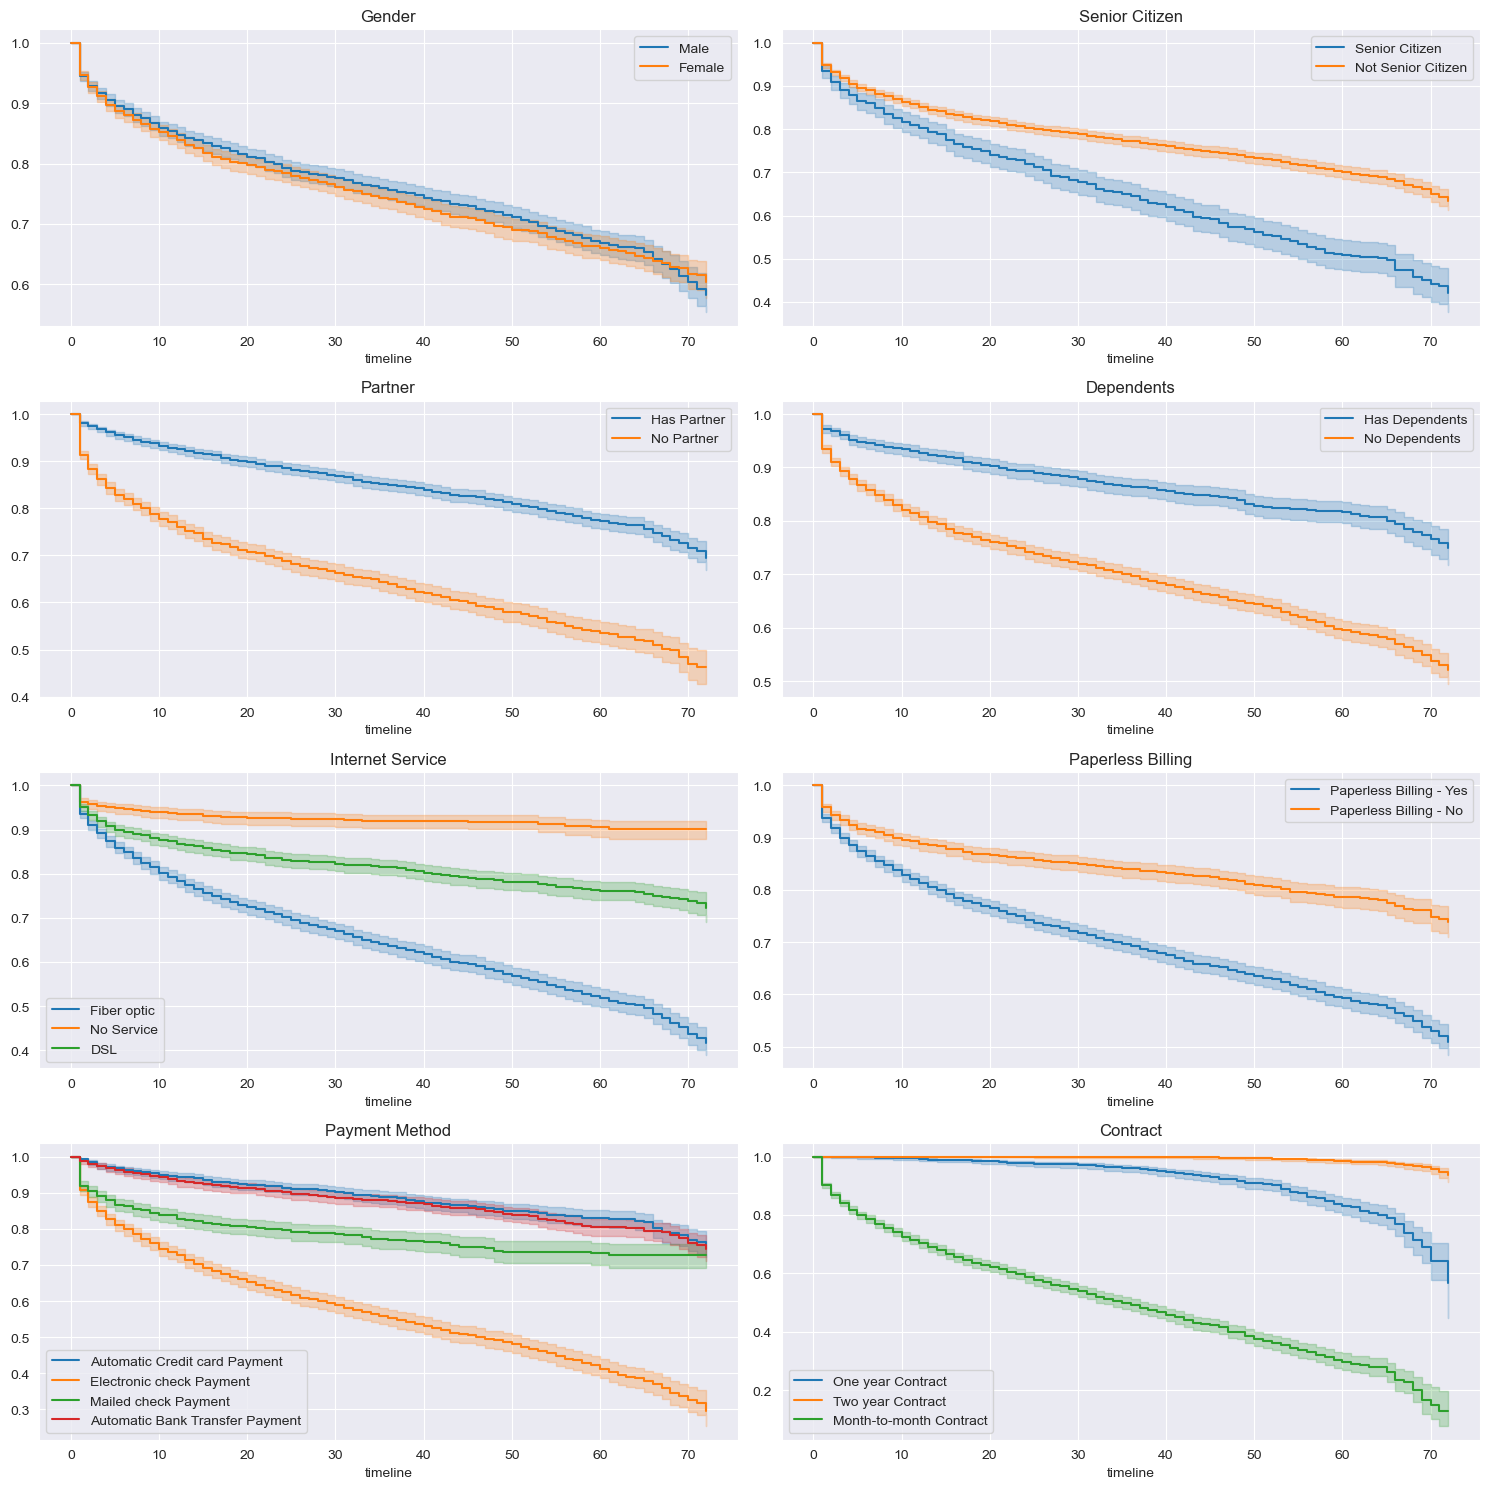

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Gender
male = (survivaldata['gender_Male'] == 1)
female = (survivaldata['gender_Male'] == 0)

kmf.fit(timevar[male], event_observed=eventvar[male], label="Male")
kmf.plot(ax=axes[0, 0])

kmf.fit(timevar[female], event_observed=eventvar[female], label="Female")
kmf.plot(ax=axes[0, 0])

axes[0, 0].set_title('Gender')

#Senior Citizen
senior_yes = (survivaldata['SeniorCitizen_1'] == 1)
senior_no = (survivaldata['SeniorCitizen_1'] == 0)
kmf.fit(timevar[senior_yes], event_observed=eventvar[senior_yes], label="Senior Citizen")
kmf.plot(ax=axes[0, 1])

kmf.fit(timevar[senior_no], event_observed=eventvar[senior_no], label="Not Senior Citizen")
kmf.plot(ax=axes[0, 1])

axes[0, 1].set_title('Senior Citizen')

# Partner
partner_yes = (survivaldata['Partner_Yes'] == 1)
partner_no = (survivaldata['Partner_Yes'] == 0)
kmf.fit(timevar[partner_yes], event_observed=eventvar[partner_yes], label="Has Partner")
kmf.plot(ax=axes[1, 0])

kmf.fit(timevar[partner_no], event_observed=eventvar[partner_no], label="No Partner")
kmf.plot(ax=axes[1, 0])

axes[1, 0].set_title('Partner')

# Dependents
dependents_yes = (survivaldata['Dependents_Yes'] == 1)
dependents_no = (survivaldata['Dependents_Yes'] == 0)
kmf.fit(timevar[dependents_yes], event_observed=eventvar[dependents_yes], label="Has Dependents")
kmf.plot(ax=axes[1, 1])

kmf.fit(timevar[dependents_no], event_observed=eventvar[dependents_no], label="No Dependents")
kmf.plot(ax=axes[1, 1])

axes[1, 1].set_title('Dependents')

# Internet Service
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

kmf.fit(timevar[Fiber_optic], event_observed=eventvar[Fiber_optic], label="Fiber optic")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[No_Service], event_observed=eventvar[No_Service], label="No Service")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[DSL], event_observed=eventvar[DSL], label="DSL")
kmf.plot(ax=axes[2, 0])

axes[2, 0].set_title('Internet Service')

# PaperlessBilling
paperless_yes = (survivaldata['PaperlessBilling_Yes'] == 1)
paperless_no = (survivaldata['PaperlessBilling_Yes'] == 0)
kmf.fit(timevar[paperless_yes], event_observed=eventvar[paperless_yes], label="Paperless Billing - Yes")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[paperless_no], event_observed=eventvar[paperless_no], label="Paperless Billing - No")
kmf.plot(ax=axes[2, 1])

axes[2, 1].set_title('Paperless Billing')

# Payment Method
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

kmf.fit(timevar[automatic_Credit_Card], event_observed=eventvar[automatic_Credit_Card], label="Automatic Credit card Payment")
kmf.plot(ax=axes[3, 0])

kmf.fit(timevar[electronic_check], event_observed=eventvar[electronic_check], label="Electronic check Payment")
kmf.plot(ax=axes[3, 0])

kmf.fit(timevar[mailed_check], event_observed=eventvar[mailed_check], label="Mailed check Payment")
kmf.plot(ax=axes[3, 0])

kmf.fit(timevar[automatic_Bank_Transfer], event_observed=eventvar[automatic_Bank_Transfer], label="Automatic Bank Transfer Payment")
kmf.plot(ax=axes[3, 0])

axes[3, 0].set_title('Payment Method')

# Contract
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

kmf.fit(timevar[Contract_One_year], event_observed=eventvar[Contract_One_year], label="One year Contract")
kmf.plot(ax=axes[3, 1])

kmf.fit(timevar[Contract_Two_year], event_observed=eventvar[Contract_Two_year], label="Two year Contract")
kmf.plot(ax=axes[3, 1])

kmf.fit(timevar[Contract_month_to_month], event_observed=eventvar[Contract_month_to_month], label="Month-to-month Contract")
kmf.plot(ax=axes[3, 1])

axes[3, 1].set_title('Contract')

plt.tight_layout()
plt.show()

#### Performing log-rank test on Gender

In [20]:
test_gender = logrank_test(timevar[male], timevar[female], event_observed_A=eventvar[male], event_observed_B=eventvar[female])
test_gender.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.10

#### Performing log-rank test on Partner

In [21]:
test_partner = logrank_test(timevar[partner_yes], timevar[partner_no], event_observed_A=eventvar[partner_yes], event_observed_B=eventvar[partner_no])
test_partner.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.92 <0.005    310.49

#### Interpretations

**Gender:** 
Visually inspecting the Kaplan Meier curve stratified by Gender, it's quite noticeable that there is not much difference in survival probabilities between the two genders.<br>
The log-rank test confirms this result as the p-value is 0.47, indicating the difference in survival probabilities is not statistically significant between the genders.
    
**Partner:**
The Kaplan Meier plot stratified by whether the customer has a Partner or not, suggests there is a difference in survival probabilities based on the customer's relationship status.
The log-rank test gives a p-value that is statistically significant indicating evidence of difference in survival probabilities based on a customer's relationship status.

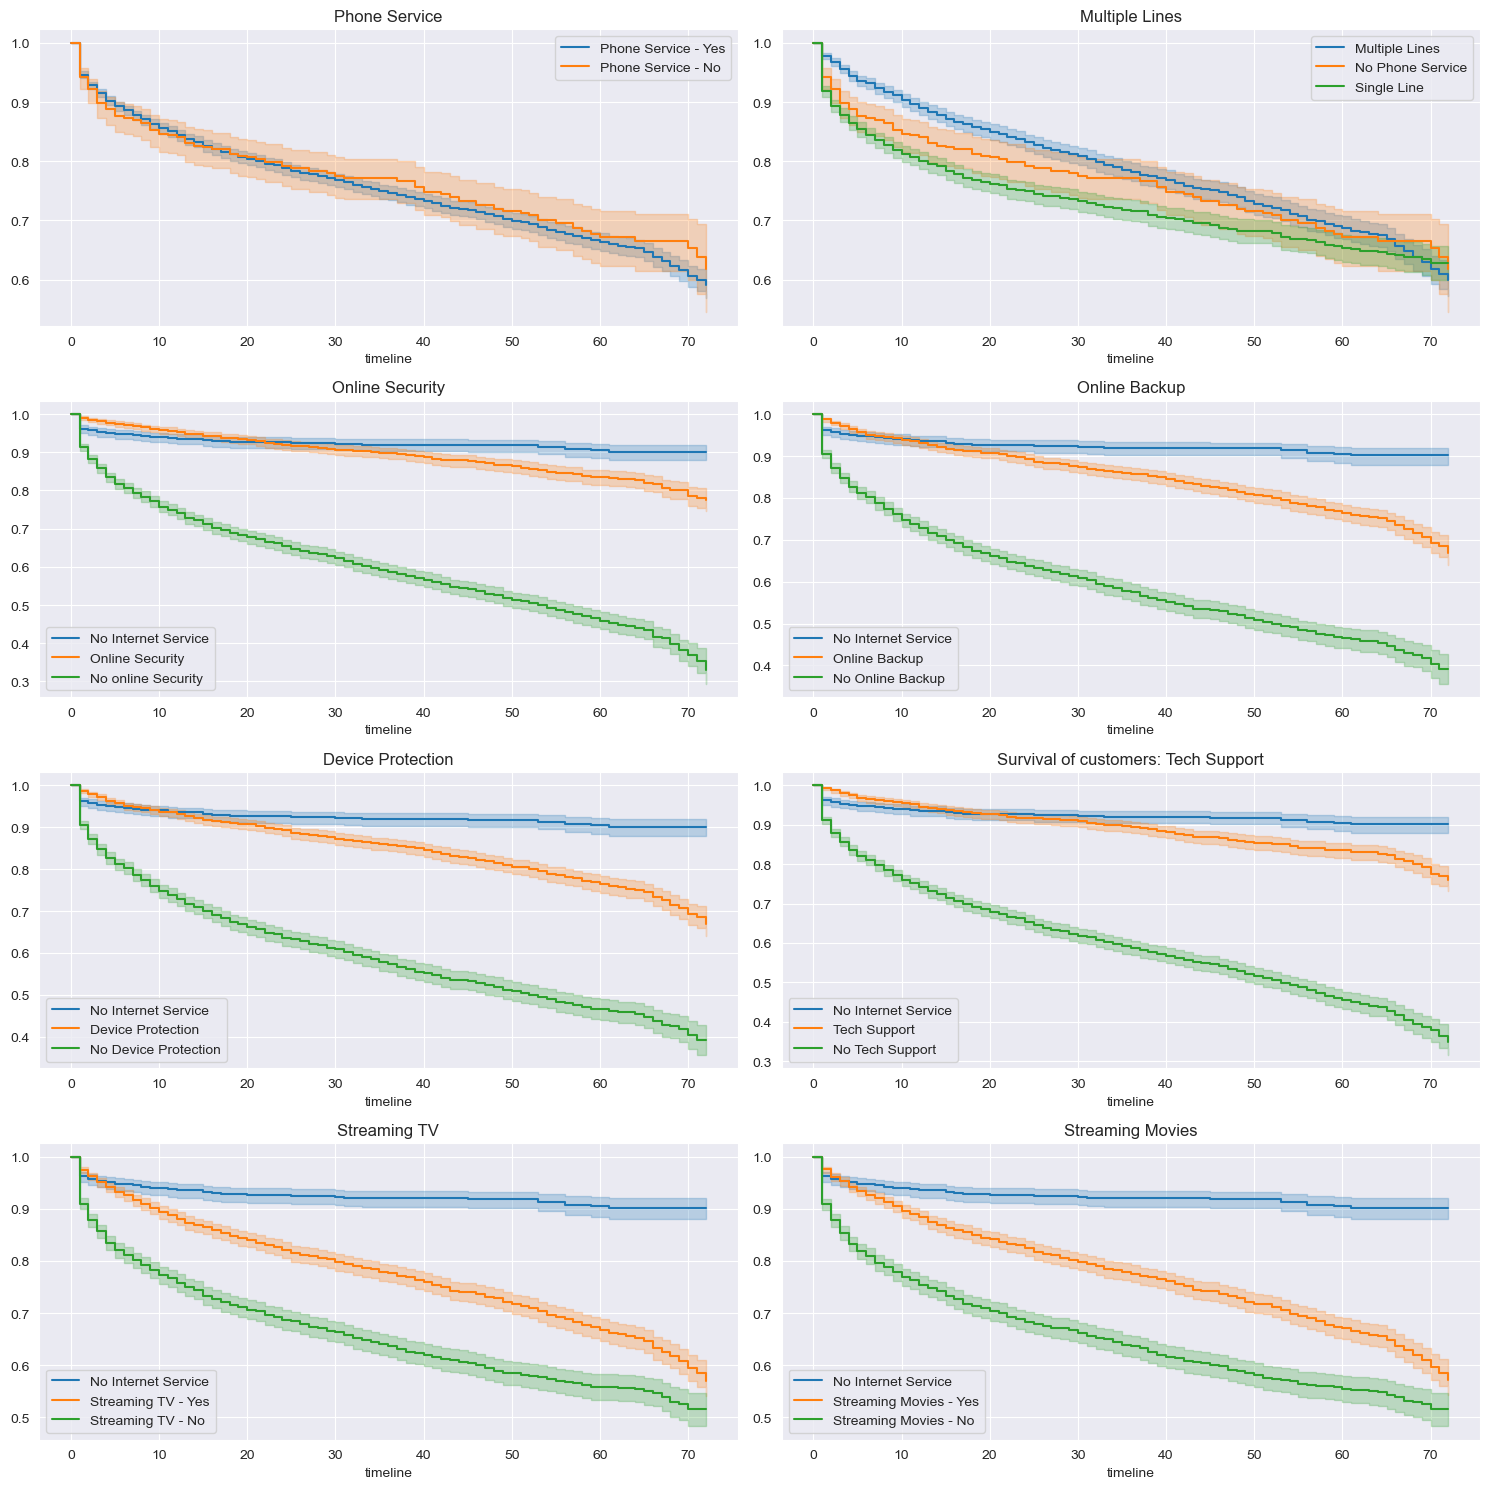

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Phone Service 

phone_yes = (survivaldata['PhoneService_Yes'] == 1)
phone_no = (survivaldata['PhoneService_Yes'] == 0)
kmf.fit(timevar[phone_yes], event_observed=eventvar[phone_yes], label="Phone Service - Yes")
kmf.plot(ax=axes[0, 0])

kmf.fit(timevar[phone_no], event_observed=eventvar[phone_no], label="Phone Service - No")
kmf.plot(ax=axes[0, 0])

axes[0,0].set_title('Phone Service')


# Multiple Lines
mult_yes = (survivaldata['MultipleLines_Yes'] == 1)
no_ph_ser = (survivaldata['MultipleLines_No phone service'] == 1)
single_line = ((survivaldata['MultipleLines_Yes'] == 0) & (survivaldata['MultipleLines_No phone service'] == 0))

kmf.fit(timevar[mult_yes], event_observed=eventvar[mult_yes], label="Multiple Lines")
kmf.plot(ax=axes[0, 1])

kmf.fit(timevar[no_ph_ser], event_observed=eventvar[no_ph_ser], label="No Phone Service")
kmf.plot(ax=axes[0, 1])

kmf.fit(timevar[single_line], event_observed=eventvar[single_line], label="Single Line")
kmf.plot(ax=axes[0, 1])

axes[0,1].set_title('Multiple Lines')

# Online Security
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) & (survivaldata['OnlineSecurity_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[1, 0])

kmf.fit(timevar[onlineSecurity], event_observed=eventvar[onlineSecurity], label="Online Security")
kmf.plot(ax=axes[1, 0])

kmf.fit(timevar[no_onlineSecurity], event_observed=eventvar[no_onlineSecurity], label="No online Security")
kmf.plot(ax=axes[1, 0])

axes[1, 0].set_title('Online Security')

# Online Backup
no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
backup = (survivaldata['OnlineBackup_Yes'] == 1)
no_backup = ((survivaldata['OnlineBackup_Yes'] == 0) & (survivaldata['OnlineBackup_No internet service'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[1, 1])

kmf.fit(timevar[backup], event_observed=eventvar[backup], label="Online Backup")
kmf.plot(ax=axes[1, 1])

kmf.fit(timevar[no_backup], event_observed=eventvar[no_backup], label="No Online Backup")
kmf.plot(ax=axes[1, 1])

axes[1, 1].set_title('Online Backup')



# Device Protection 
no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
dp = (survivaldata['DeviceProtection_Yes'] == 1)
no_dp = ((survivaldata['DeviceProtection_Yes'] == 0) & (survivaldata['DeviceProtection_No internet service'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[backup], event_observed=eventvar[backup], label="Device Protection")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[no_backup], event_observed=eventvar[no_backup], label="No Device Protection")
kmf.plot(ax=axes[2, 0])

axes[2, 0].set_title('Device Protection')


# Tech Support
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) & (survivaldata['TechSupport_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[TechSupport], event_observed=eventvar[TechSupport], label="Tech Support")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[no_TechSupport], event_observed=eventvar[no_TechSupport], label="No Tech Support")
kmf.plot(ax=axes[2, 1])

axes[2, 1].set_title('Survival of customers: Tech Support')

# Streaming TV
no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
strtv = (survivaldata['StreamingTV_Yes'] == 1)
no_strtv = ((survivaldata['StreamingTV_No internet service'] == 0) & (survivaldata['StreamingTV_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[3, 0])

kmf.fit(timevar[strtv], event_observed=eventvar[strtv], label="Streaming TV - Yes")
kmf.plot(ax=axes[3, 0])

kmf.fit(timevar[no_strtv], event_observed=eventvar[no_strtv], label="Streaming TV - No")
kmf.plot(ax=axes[3, 0])

axes[3, 0].set_title('Streaming TV')



# Streaming Movies  
no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
strm = (survivaldata['StreamingMovies_Yes'] == 1)
no_strm = ((survivaldata['StreamingMovies_No internet service'] == 0) & (survivaldata['StreamingMovies_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[3, 1])

kmf.fit(timevar[strm], event_observed=eventvar[strm], label="Streaming Movies - Yes")
kmf.plot(ax=axes[3, 1])

kmf.fit(timevar[no_strm], event_observed=eventvar[no_strm], label="Streaming Movies - No")
kmf.plot(ax=axes[3, 1])

axes[3, 1].set_title('Streaming Movies')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#### Performing log-rank tests on Phone Service

In [23]:
phone = logrank_test(timevar[phone_yes], timevar[phone_no], event_observed_A=eventvar[phone_yes], event_observed_B=eventvar[phone_no])
phone.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.44 0.51      0.97

#### Interpretations

**Phone Service**: The p-value obtained from the log-rank tests above suggests that the difference in survival probabilities between customers who have opted for the company's Phone Service feature or not, is not statistically significant. Visually inspecting the above Kaplan Meier plot also confirms this.

#### Similar tests can be performed on other variables to test their statistical significance.

## Semi-Parametric Methods

## Cox Proportional Hazards Model 

In [24]:
data = pd.read_csv("customer_data.csv")

In [25]:
categories = ["Churn","gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]              

In [26]:
df = pd.get_dummies(data, columns = categories, drop_first=True)

In [27]:
df.drop(["customerID","TotalCharges"], inplace = True, axis = 1)

In [28]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tenure', event_col='Churn_Yes')

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

The above method halted due to a possibility of high multicollinearity among variables. A correlation heatmap can confirm this!

<Axes: >

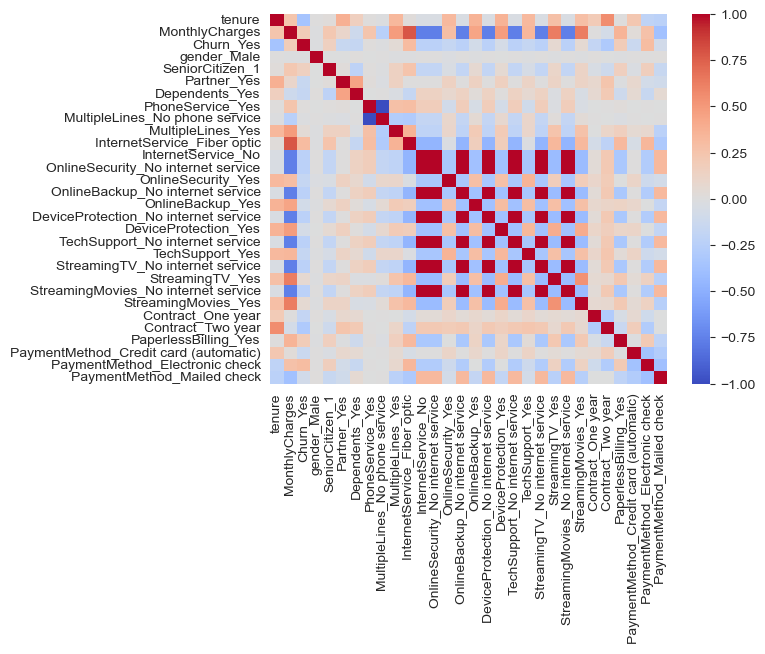

In [29]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False,xticklabels=df.corr().columns, yticklabels=df.corr().columns)

It's quite evident that there's an extra factor for the variables associated with the company's internet services. This is leading to perfect correlation between some variables. <br> For example, OnlineSecurity has 3 levels: 'Yes', 'No' , 'No internet service'. The latter level is redundant and can be quoted as a 'No' to reduce complexity. Similar changes can be done on other variables having this redundant level.

In [30]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID","TotalCharges"], inplace = True, axis = 1)
  
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 1 if x == "Male" else 0)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    categories = ['InternetService', 'Contract', 'PaymentMethod']
    
    df = pd.get_dummies(df, columns = categories, drop_first=True)
    
    return df

In [31]:
df = datapreparation("customer_data.csv")

<Axes: >

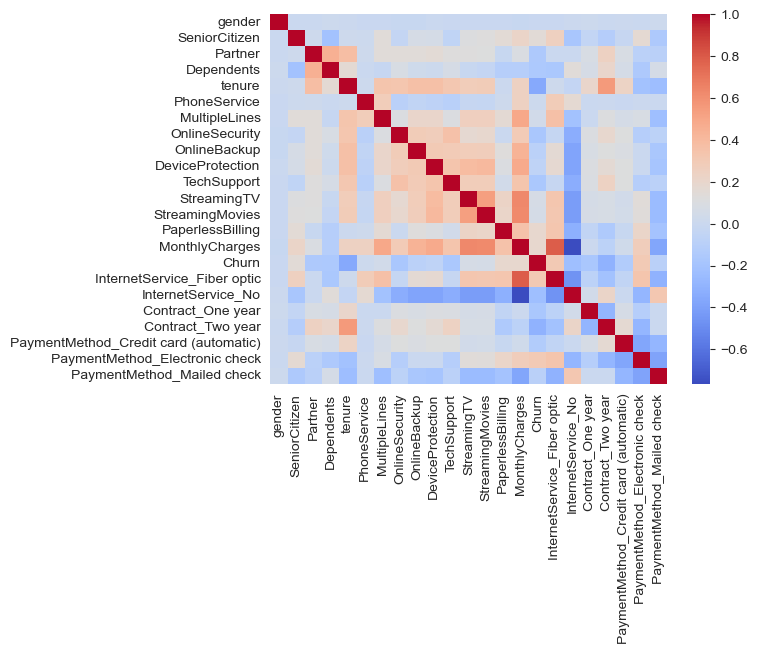

In [32]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=False,xticklabels=df.corr().columns, yticklabels=df.corr().columns)

A noticeable reduction in multicollinearity on comparison with the previous heatmap. 

In [33]:
# Fitting a cox proportional hazards model
cph = CoxPHFitter()
cph.fit(df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13884.62
         time fit was run = 2023-04-25 20:17:38 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                 -0.09       0.92       0.05            -0.18             0.01                 0.84                 1.01
SeniorCitizen                          -0.07       0.93       0.06            -0.18             0.04                 0.83                 1.04
Partner                                -0.52       0.60       0.06            -0.63            -0.41                 0.53                 0.66
Dependents                             -0.05       0.95       0.07            -0.19             0.08                 0.83                 1.08
PhoneService                            0.25       1.29       0.47            -0.67             1.18                 0.51                 3.25
MultipleLines                          -0.42       0.66       0.13            -0.67            -0.17                 0.51                 0.84
OnlineSecurity                         -0.61       0.54       0.13            -0.87            -0.35                 0.42                 0.70
OnlineBackup                           -0.61       0.54       0.13            -0.86            -0.36                 0.42                 0.69
DeviceProtection                       -0.28       0.75       0.13            -0.53            -0.04                 0.59                 0.96
TechSupport                            -0.37       0.69       0.13            -0.63            -0.11                 0.53                 0.90
StreamingTV                             0.04       1.04       0.24            -0.42             0.50                 0.66                 1.66
StreamingMovies                        -0.05       0.95       0.24            -0.52             0.41                 0.60                 1.50
PaperlessBilling                        0.18       1.20       0.06             0.07             0.29                 1.07                 1.34
MonthlyCharges                         -0.01       0.99       0.02            -0.05             0.04                 0.95                 1.04
InternetService_Fiber optic             0.59       1.80       0.58            -0.54             1.71                 0.58                 5.55
InternetService_No                     -1.30       0.27       0.59            -2.45            -0.15                 0.09                 0.86
Contract_One year                      -1.62       0.20       0.09            -1.79            -1.44                 0.17                 0.24
Contract_Two year                      -3.23       0.04       0.16            -3.56            -2.91                 0.03                 0.05
PaymentMethod_Credit card (automatic)  -0.08       0.92       0.09            -0.26             0.09                 0.77                 1.10
PaymentMethod_Electronic check          0.59       1.80       0.07             0.45             0.73                 1.56                 2.07
PaymentMethod_Mailed check              0.57       1.76       0.09             0.39             0.74                 1.48                 2.09

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00  -1.84   0.07       3.93
SeniorCitizen                             0.00  -1.26   0.21       2.27
Partner                                   0.00  -9.40 <0.

In [34]:
cph.concordance_index_.round(2)

0.87

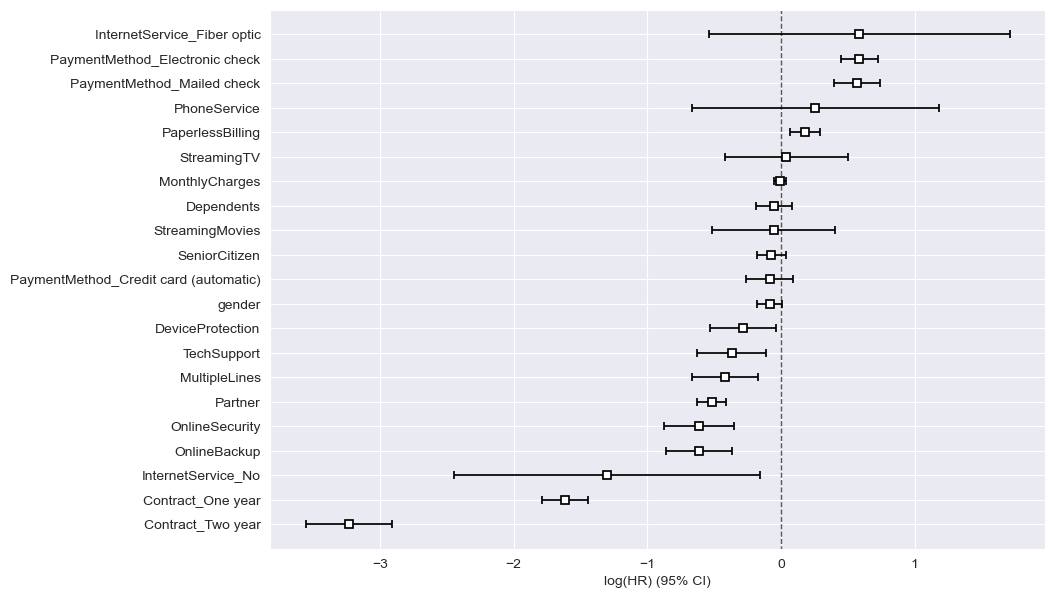

In [35]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

#### Interpretations

**Concordance Index** <br>
A concordance index of 0.87 indicates the model's ability to accurately rank the survival times of customers. The c-index is interested in the order of the predictions than the predictions themselves.

For example, let A & B have true churn in month 3 and 8 respectively. <br>If the model predicts that A & B churn in month 3 and 8 respectively - the concordance index would be 1. Also, if the model predicts that A & B would churn in month 15 and 16 respectively, the concordance index would still be 1.

As mentioned above, the c - index is only interested in the order of the predictions than the actual survival predictions.

**Hazard Ratios** <br>
From the plot above all variables having negative log(HR) indicate that the probability of the event(Churn in our case) happening for that variable is less than the baseline model. 

For example, customers subscribed to two-year contracts are exp(log(HR)) times likely to Churn than customers on a monthly plan(baseline model).
In other terms, customers on two-year contracts are 0.04 times likely to Churn than customers on monthly plans.

Similarly, for Internet Service, the baseline model is InternetService = DSL. From the plot above customers who have opted for the company's Fiber Optic are at a risk of churning more than the ones subscribed to the company's fiber optic since the log(HR) is positive for this case.Customers who have not opted for any internet service are at a lesser risk of churning. <br>  This confirms the inference made in EDA that the company's internet service is probably not upto the customer's expectation.

In [36]:
import random 
random.seed(10)
test = df.sample(random_state = pd.np.random.RandomState(10)) # Samples a random observation from the dataframe

/var/folders/70/3f82wdf11_sb_7z145nld9s40000gn/T/ipykernel_54596/1192151914.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  test = df.sample(random_state = pd.np.random.RandomState(10)) # Samples a random observation from the dataframe


The below plots gives us the survival probability and cumulative hazard for a randomly selected sample from the dataset.

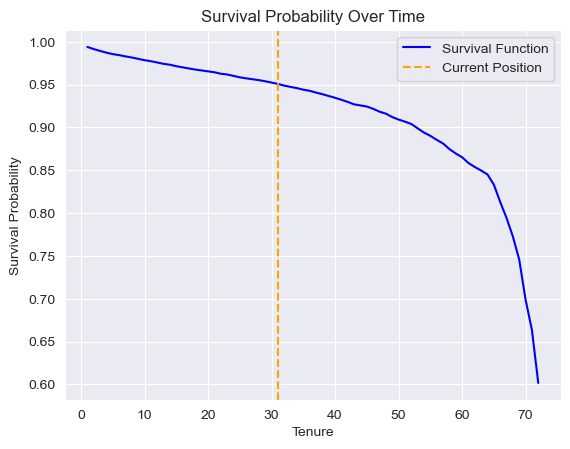

In [37]:
# cph.predict_survival_function() gives us the predicted survival probability at that time

fig, ax = plt.subplots()
cph.predict_survival_function(test).plot(ax = ax, color = 'blue')
plt.axvline(x=test.tenure.values[0], color = 'orange', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

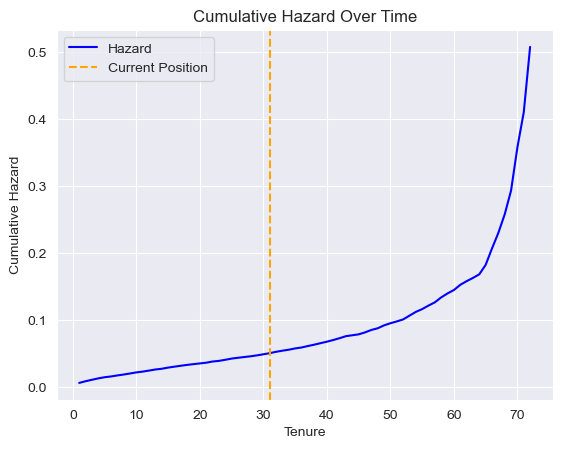

In [38]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test).plot(ax = ax, color = 'blue')
plt.axvline(x=test.tenure.values[0], color = 'orange', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

## Penalized Cox Models

In [39]:
# Import required libraries

import matplotlib.pyplot as plt
%matplotlib inline

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text") 

In [40]:
regression_df = datapreparation("customer_data.csv")

In [41]:
tenure = regression_df['tenure']
churn = regression_df['Churn']

In [42]:
X = regression_df
X.drop(['tenure', 'Churn','MonthlyCharges'], axis = 1, inplace= True)

In [43]:
Xt = OneHotEncoder().fit_transform(X)
Xt.round(2).head()

/Users/vishalreddy/opt/anaconda3/lib/python3.9/site-packages/sksurv/column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0


In [44]:
structured_array = np.empty((len(churn),), dtype=[('churn', bool), ('tenure', float)])
structured_array['churn'] = churn.astype(bool)
structured_array['tenure'] = tenure.astype(float)

### RIDGE

In [45]:
y = structured_array
alphas = 10. ** np.linspace(-4,4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()
for alpha in alphas:
    cph.set_params(alpha=alpha)
    cph.fit(Xt, y)
    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = (pd.DataFrame
    .from_dict(coefficients)
    .rename_axis(index="feature", columns="alpha")
    .set_index(Xt.columns))


In [46]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

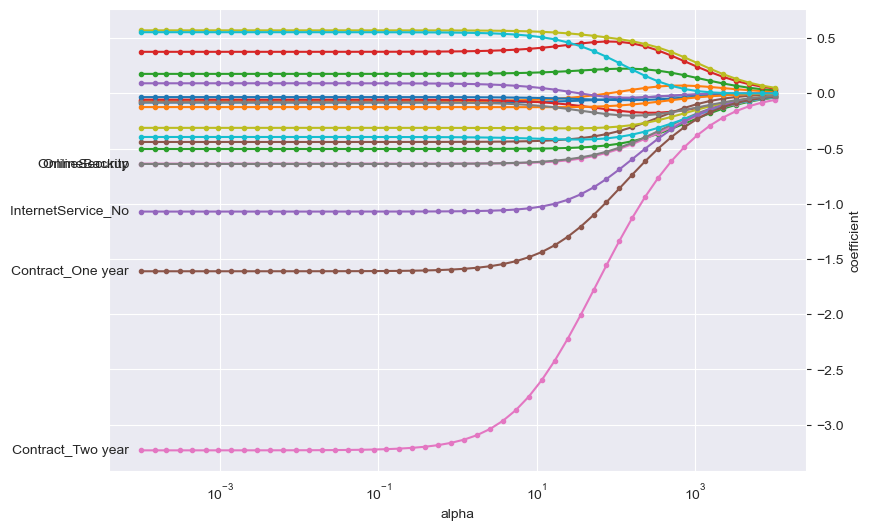

In [47]:
plot_coefficients(coefficients, n_highlight=5)

The Ridge or the L2 regularization technique reduces the values of coefficients on the model. From the above plot, unless the penalty is huge(10^3), the coefficients are not reduced to zero. 

### LASSO

In [48]:
cox_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
cox_lasso.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

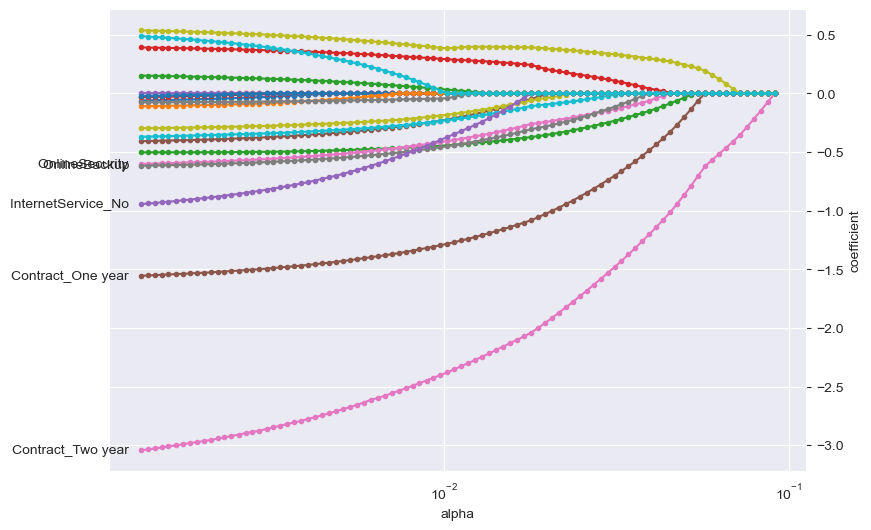

In [49]:
coefficients_lasso = pd.DataFrame(
    cox_lasso.coef_,
    index=Xt.columns,
    columns=np.round(cox_lasso.alphas_, 5)
)

plot_coefficients(coefficients_lasso, n_highlight=5)

The LASSO or the L1 model shrinks the coefficients towards 'zero' and therefore performs variable selection operations as well. As alpha increases from left to right, the variables are shrunk towards zero!

#### Choosing Alpha using Elastic Net

In [50]:
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(Xt, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [51]:
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1).fit(Xt, y)

cv_results = pd.DataFrame(gcv.cv_results_)

In [52]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

# fig, ax = plt.subplots(figsize=(9, 6))
# ax.plot(alphas, mean)
# ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
# ax.set_xscale("log")
# ax.set_ylabel("concordance index")
# ax.set_xlabel("alpha")
# ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
# ax.axhline(0.5, color="grey", linestyle="--")
# ax.grid(True)

Number of non-zero coefficients: 20


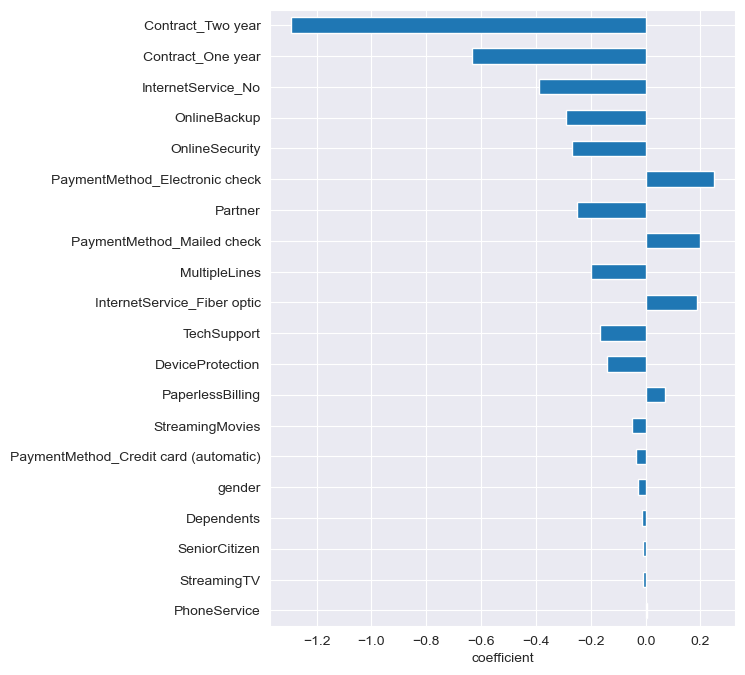

In [53]:
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=Xt.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

The above plot gives us the value of coefficients of the best model chosen with the Cross-Validation technique. Important variables are clearly noticeable from the above plot! We will see if other models choose the same variables as well. 

## Parametric Methods

## Weibull Survival Model (or) Accelerated Failure Time Model

In [54]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [55]:
data = pd.read_csv("customer_data.csv")

In [56]:
## Churn = 'Yes' - the customer has cancelled subscription with the company
## Churn = 'No'  - the customer has been censored/lost track of the customer

In [57]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID","TotalCharges"], inplace = True, axis = 1)

    #df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    #df.TotalCharges.fillna(0, inplace = True)
    #df.TotalCharges = df.TotalCharges.astype(float)
  
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    categories = ['InternetService', 'Contract', 'PaymentMethod']
    
    df = pd.get_dummies(df, columns = categories, drop_first=True)
    
    return df

In [58]:
data = datapreparation('customer_data.csv')

The AIC value for the Weibull model is less than the Exponential Model. Therefore, we will use that for parametric modeling!

In [59]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter

# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()

# Fit to data
for model in [wb, ex]:
    model.fit(durations = data["tenure"], event_observed = data["Churn"])
# Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for WeibullFitter is 21157.25189215942
The AIC value for ExponentialFitter is 21697.15196629894


In [60]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(data, duration_col='tenure', event_col='Churn')
weibull_aft.print_summary(1)

<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -8915.6
         time fit was run = 2023-04-25 20:19:39 UTC

---
                                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                                     
lambda_ Contract_One year                        1.6        4.8        0.1              1.4              1.8                  4.0                  5.8
        Contract_Two year                        2.8       16.9        0.2              2.5              3.2                 12.0                 23.8
        Dependents                               0.1        1.1        0.1             -0.0              0.2                  1.0                  1.3
        DeviceProtection                         0.3        1.3        0.1             -0.0              0.5                  1.0                  1.7
        InternetService_Fiber optic             -0.7        0.5        0.6             -1.9              0.5                  0.1                  1.7
        InternetService_No                       1.5        4.5        0.6              0.3              2.7                  1.3                 15.5
        MonthlyCharges                           0.0        1.0        0.0             -0.0              0.1                  1.0                  1.1
        MultipleLines                            0.4        1.5        0.1              0.2              0.7                  1.2                  2.0
        OnlineBackup                             0.6        1.8        0.1              0.3              0.8                  1.4                  2.3
        OnlineSecurity                           0.6        1.9        0.1              0.3              0.9                  1.4                  2.5
        PaperlessBilling                        -0.2        0.8        0.1             -0.3             -0.1                  0.7                  0.9
        Partner                                  0.5        1.7        0.1              0.4              0.6                  1.5                  1.9
        PaymentMethod_Credit card (automatic)    0.1        1.1        0.1             -0.1              0.3                  0.9                  1.3
        PaymentMethod_Electronic check          -0.6        0.5        0.1             -0.8             -0.5                  0.5                  0.6
        PaymentMethod_Mailed check              -0.6        0.5        0.1             -0.8             -0.4                  0.4                  0.6
        PhoneService                            -0.3        0.7        0.5             -1.3              0.7                  0.3                  1.9
        SeniorCitizen                            0.1        1.1        0.1             -0.1              0.2                  0.9                  1.2
        StreamingMovies                          0.0        1.0        0.3             -0.5              0.5                  0.6                  1.7
        StreamingTV                             -0.1        0.9        0.3             -0.6              0.4                  0.6                  1.5
        TechSupport                              0.4        1.5        0.1              0.1              0.7                  1.1                  2.0
        gender                                  -0.1        0.9        0.1             -0.2              0.0                  0.8                  1.0
        Intercept                                3.3       26.4        0.6              2.0              4.5                  7.7                 90.8
rho_    Intercept                           

#### Interpretations

A concordance index or c-index of 0.9 means that the model predict's the survival times with high accuracy. It indicates the model's ability to correctly rank the order of survival times of customers, such that those with shorter survival times are predicted to churn earlier and those with higher survival times would stay with the company for longer.

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

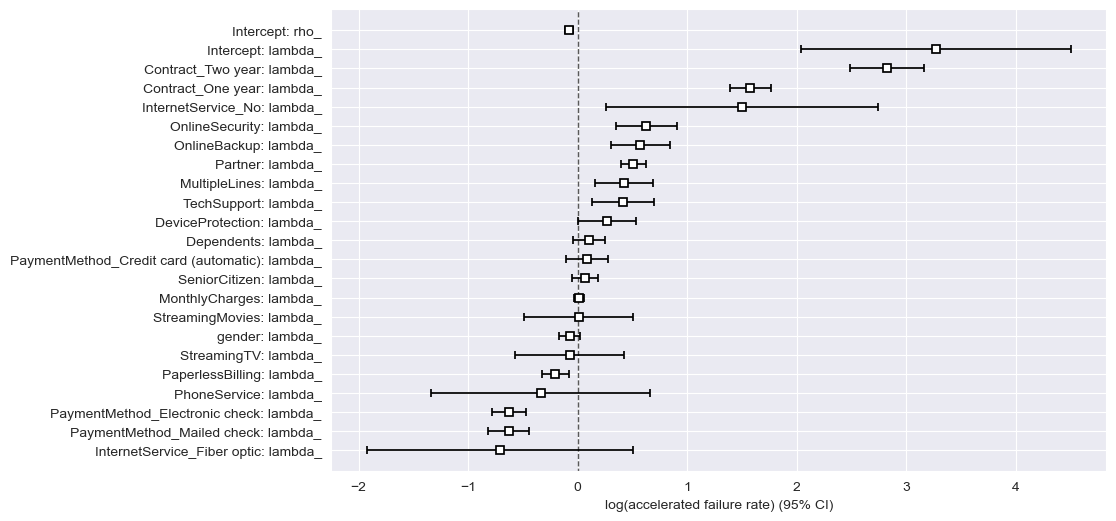

In [61]:
# Plotting coeffiecients
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

In [62]:
# Median Survival Time (in months)
print(weibull_aft.median_survival_time_.round(2))

24.21


In [63]:
# Mean Survival Time (in months)
print(weibull_aft.mean_survival_time_.round(2))

37.39


#### Interpretations 

Let us look at the variable - Contract.
Customers essentially register with the company on (a) Monthly contract, (b) One-Year contract or (c) Two-eyars contract.

1) Customers who enroll in the Two-Year option have an estimated survival time of exp(coef) = 16.9 times the ones opted for the Monthly option(baseline model).

2) Similarly, customers who enrolled in One-Year contracts have an estimated survival time of exp(coef) = 4.8 times the Monthly customers. 

Therefore, the company should lure customers to opt for longer contracts in order to get higher CLV(Customer Lifetime Value)

Another interesting service to look at is the company's Internet Service option.

Customers who have NOT opted for the company's internet service have a positive coefficient of 1.5. This means that Customers who have opted Internet_Service = (No) have 4.5 times better survival chance than the ones who have opted Internet_Service = (Yes).

This probably means that the company's internet service is not upto the customer's expectation!

##  Random Survival Trees

In [64]:
# pip install pycox

In [65]:
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from lifelines.utils import concordance_index
from pycox.evaluation import EvalSurv

In [66]:
df = pd.read_csv('customer_data.csv')

In [67]:
df = df.drop(['customerID', 'TotalCharges'], axis=1)

In [68]:
N = df.shape[0]
hasNotChurned = sum(df['Churn']=='No')
hasChurned = sum(df['Churn']=='Yes')

# print(f'Number of samples: {N}')
# print(f'Number of columns: {df.shape[1]}')
# print(f'Number of customers that have churned: {hasChurned}')
# print(f'Number of customers that have not churned yet: {hasNotChurned}')
# print(f'Percentage of customers that have churned: {100*hasChurned/len(df):.0f}%')
# print(f'Percentage of customers that have not churned yet: {100*hasNotChurned/len(df):.0f}%')

In [69]:
df['Churn'] = df['Churn'].map({'No': False, 'Yes': True})

# creating one-hot columns
categories = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=categories, drop_first=True, dtype=float)


In [70]:
# creating the time and event columns
event_col = 'Churn'
time_col = 'tenure'

# extracting the features/covariables
features = np.setdiff1d(df.columns, [time_col, event_col]).tolist()

We split the dataset into training (70%) and testing (30%) datasets.

In [71]:
# Splitting data into training and validation sets
index_train, index_test = train_test_split(df.reset_index(), test_size = 0.3, random_state=0)
data_train = df.loc[index_train['index']].reset_index(drop=True)
data_test  = df.loc[index_test['index']].reset_index(drop=True)

# Creating the X, T and E inputs
X_trn, X_val = data_train[features], data_test[features]
T_trn, T_val = data_train[time_col], data_test[time_col]
E_trn, E_val = data_train[event_col], data_test[event_col]

In [72]:
rsf = RandomSurvivalForest(n_estimators=100, random_state=0)
X_trn1 = X_trn[E_trn == True]
T_trn1 = T_trn[E_trn == True]
E_trn1 = E_trn[E_trn == True]

In [73]:
y_trn = np.rec.fromarrays([E_trn.astype(bool), T_trn], names=['event', 'time'])

In [74]:
rsf.fit(X_trn, y_trn)

RandomSurvivalForest(random_state=0)

In [75]:
y_val = np.rec.fromarrays([E_val.astype(bool), T_val], names=['event', 'time'])
c_index = rsf.score(X_val, y_val)
print("Concordance index on test set: {:.3f}".format(c_index))

Concordance index on test set: 0.845


In [76]:
ci_rsf_trn = concordance_index(T_trn, -rsf.predict(X_trn), E_trn)
ci_rsf_val = concordance_index(T_val, -rsf.predict(X_val), E_val)

print(f'Concordance index of Random survival forest: train: {ci_rsf_trn:.3f}, valid: {ci_rsf_val:.3f}')

Concordance index of Random survival forest: train: 0.900, valid: 0.845


In [77]:
from sklearn.inspection import permutation_importance

Text(0.5, 1.0, 'Feature Importance Scores - Random Survival Forest')

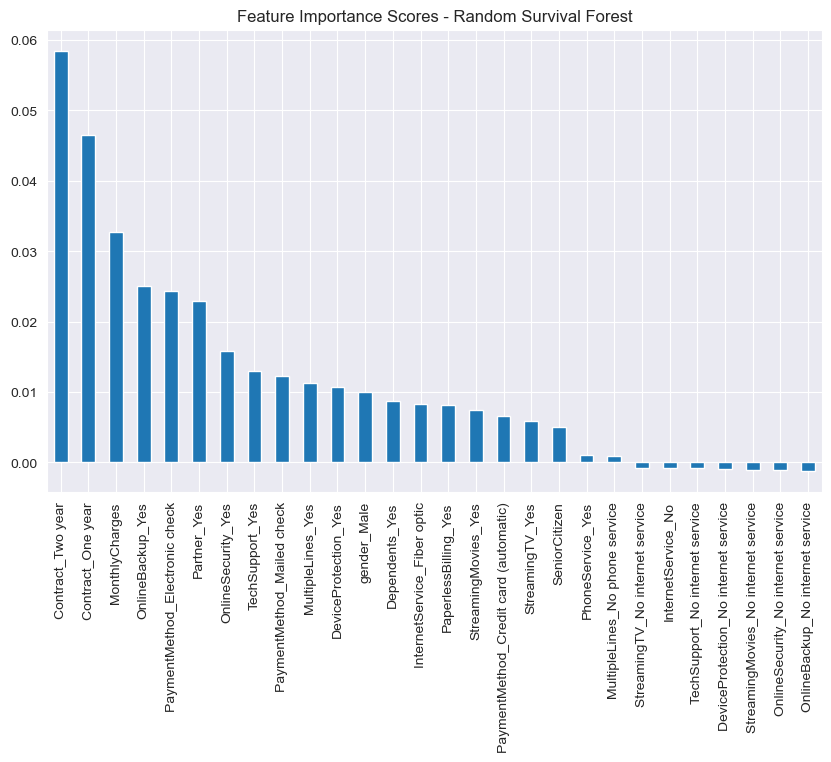

In [78]:
result = permutation_importance(rsf, X_trn, y_trn, n_repeats=10, random_state=0)
feature_importances = pd.Series(result.importances_mean, index=X_trn.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature Importance Scores - Random Survival Forest")

#### Interpretations


From the above variable importance chart by the random forest method, 'Contract' seems to be the most influential variable again for customer churning, followed by 'MonthlyCharges'.

## Conclusion

Although all  models fetched similar results in terms of variable importance for Churning, they differ in the way they are performed. Every statistical method(parametric/non-parametric/semi-parametric) has it's own pros and cons. 

The non-parametric methods do not make any assumptions about the distribution of the data and hence are the closest to the real-life situation and their plots are easy to interpret. The downside to this approach is that hazard-ratios cannot be estimated. Another drawback is that it can only include categorical variables.

Parametric methods are conducted based on the assumption that hazard is constant over time. The Weibull model used in this project allows hazard to increase/decrease over time. Parametric methods can be used to estimate the survival probalities and hazard ratios. 

Lastly, semi-parametric methods are a mix of parametric and non-parametric methods. These methods assume that hazards can fluctuate with time(similar to non-parametric methods).

From the analysis performed above - Customers who have opted for longer term contracts have better survival probabilities than ones who opted for shorter contracts. Payment Method is another influential variable for customer churn. Customers who have not opted for automatic payments are at a higher risk of churning than the ones who've scheduled automatic payments. Additionally, the company's internet service seems to be unsatisfactory for the customers and ones subscribed to the internet service along with the network service have significantly higher probabilities to churn.  

## Scope


Nested modeling can be performed based on the importance of variables, to keep only the statistically significant variables without affecting the concordance index and reducing the dimensionality at the same time.<br>
The data can further be divided into two parts - based on whether the customer has opted for the internet connection or not. 
This also facilitates analysis on a deeper level based on what exact service(ones who opted for internet service) is unsatisfactory to the customers. For example, of customers who have the internet service, if they happen to stream a lot of movies and have low survival probabilities - it could mean that the company's internet service is slow. 